<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Kiparenko-Nikolai-folder/Kiparenko%20Nikolai/INSPECTRUM_CLINIC_HR_RECSYS_GR1_AUTO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

import h2o

from h2o.automl import H2OAutoML

!pip install autokeras
import autokeras as ak


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=f6b0ce19cff4803d9ce8625f98190b4797611b63d092c9ba39cb10b6a73bb5a8
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.0 MB/s eta 0:00:00


In [ ]:

# Загрузка датасетов из облака
import gdown

# Функции операционной системы
import os

# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# автоматически парсит строку и сохранит ее в переменной datetime
import datetime

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Отрисовка графиков
import matplotlib.pyplot as plt
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
#Грузим файл
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)   



'dataS.xlsx'

In [ ]:
#Читаем файл
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
data.head(5)

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


### Вспомогательные функции

In [ ]:
def convertDataSet(data): 
          #Если необходимо переименовать
          data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']
          #Разбираем Дату раждения
          Birth = data['Gender'].apply(lambda x: x.split(',')[2].strip() if len(x.split(','))>2 else '')
          data = data.assign(Birth=Birth)
          #Разбираем Возраст
          Age = data['Gender'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(Age=Age)

          #Тип образования
          DegreeOfStudy = data['Education'].apply(lambda x: x.split(',')[0].strip() if len(x.split(','))>1 else '')
          data = data.assign(DegreeOfStudy=DegreeOfStudy)
          #Год окончания образования
          YearOfGraduation = data['Education'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
          data = data.assign(YearOfGraduation=YearOfGraduation)

          #Формируем список месяцев
          month_name = {1: 'января', 2: 'февраля', 3: 'марта', 4: 'апреля', 5: 'мая', 6: 'июня',
                7: 'июля', 8: 'августа', 9: 'сентября', 10: 'октября', 11: 'ноября', 12: 'декабря'}


          for i, row in data.iterrows():
            #Gender
            row.Gender = row.Gender.split(',')[0].strip() 
            #Женщина = 0, Мужчина = 1
            row.Gender = row.Gender.replace('Женщина','0')
            row.Gender = row.Gender.replace('Мужчина','1')
            row.Gender = int(row.Gender)

            #Birth
            row.Birth = row.Birth.replace('родился','')
            row.Birth = row.Birth.replace('родилась','')
          
            #Age
            row.Age = row.Age.replace('года','')
            row.Age = row.Age.replace('год','')
            row.Age = row.Age.replace('лет','')
            row.Age = row.Age='' if 0 else row.Age

            try:
              row.Age = int(row.Age)
            except (IndexError, TypeError, ValueError):
              print(row.Age)
              row.Age = 0

            try:
                row.YearOfGraduation = int(row.YearOfGraduation)
            except (IndexError, TypeError, ValueError):
                print(row.YearOfGraduation)
                row.YearOfGraduation = 0

            #Salary
            row.Salary = row.Salary.replace(' ','') 
            row.Salary = str(float(row.Salary.replace('KGS',''))*0.89)      if row.Salary.find('KGS') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('KZT',''))*0.18)      if row.Salary.find('KZT') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('USD',''))*78.00)     if row.Salary.find('USD') != -1 else row.Salary
            row.Salary = str(float(row.Salary.replace('EUR',''))*85.00)     if row.Salary.find('EUR') != -1 else row.Salary
            row.Salary = row.Salary.replace('руб.','')
            row.Salary = row.Salary.replace('руб','')
            row.Salary = row.Salary.replace('неуказана','0')
            row.Salary = int(float(row.Salary)) 

            #Experience
            row.Experience = row.Experience.replace('Опыт работы —','')
            row.Experience = row.Experience.replace('Опыт работы','')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('лет',';')
            row.Experience = row.Experience.replace('годов',';')
            row.Experience = row.Experience.replace('год',';')
            row.Experience = row.Experience.replace('года',';')
            row.Experience = row.Experience.replace('месяцев','')
            row.Experience = row.Experience.replace('месяца','')
            row.Experience = row.Experience.replace('месяц','')
            row.Experience = row.Experience.replace('нет','0')
            #Приводим к месяцам, если были года умножаем на 12 иначе берем как есть 
            row.Experience = (int(row.Experience.split(';')[0].strip()) * 12 + (int(row.Experience.split(';')[1].strip())) if row.Experience.split(';')[1].strip() != '' else int(row.Experience.split(';')[0].strip()) * 12) if len(row.Experience.split(';')) >1 else int(row.Experience.strip()) 

            #Schedule
            #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
            row.Schedule = row.Schedule.replace('вахтовый метод','0')
            row.Schedule = row.Schedule.replace('удаленная работа','1')
            row.Schedule = row.Schedule.replace('гибкий график','2')
            row.Schedule = row.Schedule.replace('полный день','3')
            row.Schedule = row.Schedule.replace('сменный график','4')

            #Employment
            #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
            row.Employment = row.Employment.replace('проектная работа','0')
            row.Employment = row.Employment.replace('неполный рабочий день','1')
            row.Employment = row.Employment.replace('полный рабочий день','2')
            row.Employment = row.Employment.replace('полная занятость','3')
            row.Employment = row.Employment.replace('частичная занятость','4')
            row.Employment = row.Employment.replace('стажировка','5')
            row.Employment = row.Employment.replace('волонтерство','6')

            #Birth
            for i in month_name:
              row.Birth         = row.Birth.replace(month_name[i],'-'+str(i)+'-')
          
            row.Birth         = row.Birth.replace('родился','')
            row.Birth         = row.Birth.replace('родилась','')
            row.Birth         = row.Birth.replace(' -','-')
            row.Birth         = row.Birth.replace('- ','-')
            row.Birth         = row.Birth+' 00:00:00'

            row.Birth = '1-1-1' +row.Birth if row.Birth == ' 00:00:00' else row.Birth
            day = int(row.Birth.split('-')[0].strip()) 
            month = int(row.Birth.split('-')[1].strip()) 
            year = row.Birth.split('-')[2].strip() 
            time = year.split(' ')[1].strip()
            year = int(year.split(' ')[0].strip())

            row.Birth = int(datetime.datetime(year,month,day).utcnow().timestamp())

            #Update_resume 
            for i in month_name:
              row.Update_resume = row.Update_resume.replace(month_name[i],'-'+str(i)+'-')
          
            row.Update_resume = row.Update_resume.replace('в','')
            row.Update_resume = row.Update_resume.replace(' -','-')
            row.Update_resume = row.Update_resume.replace('- ','-')
            row.Update_resume = row.Update_resume+':00'

            day = int(row.Update_resume.split('-')[0].strip()) 
            month = int(row.Update_resume.split('-')[1].strip()) 
            year = row.Update_resume.split('-')[2].strip() 
            year = year.replace('  ',';')
            year = year.replace(' ',';')
            
            time = year.split(';')[1].strip()
            year = int(year.split(';')[0].strip())
            hour = int(time.split(':')[0].strip())
            minute = int(time.split(':')[1].strip())

            row.Update_resume = int(datetime.datetime(year,month,day,hour,minute,0).utcnow().timestamp())

            #Response_date
            row.Response_date = int(datetime.datetime.utcnow().timestamp())

          #Переведем в бинарные значения

          #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
          Employment_0 = data['Employment'].apply(lambda x: 1 if x.find('0') else 0)
          Employment_1 = data['Employment'].apply(lambda x: 1 if x.find('1') else 0)
          Employment_2 = data['Employment'].apply(lambda x: 1 if x.find('2') else 0)
          Employment_3 = data['Employment'].apply(lambda x: 1 if x.find('3') else 0)
          Employment_4 = data['Employment'].apply(lambda x: 1 if x.find('4') else 0)
          Employment_5 = data['Employment'].apply(lambda x: 1 if x.find('5') else 0)
          Employment_6 = data['Employment'].apply(lambda x: 1 if x.find('6') else 0)

          data = data.assign(Employment_0=Employment_0,
                              Employment_1=Employment_1,
                              Employment_2=Employment_2,
                              Employment_3=Employment_3,
                              Employment_4=Employment_4,
                              Employment_5=Employment_5,
                              Employment_6=Employment_6)

          #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
          Schedule_0 = data['Schedule'].apply(lambda x: 1 if x.find('0') else 0)
          Schedule_1 = data['Schedule'].apply(lambda x: 1 if x.find('1') else 0)
          Schedule_2 = data['Schedule'].apply(lambda x: 1 if x.find('2') else 0)
          Schedule_3 = data['Schedule'].apply(lambda x: 1 if x.find('3') else 0)
          Schedule_4 = data['Schedule'].apply(lambda x: 1 if x.find('4') else 0)

          data = data.assign(Schedule_0=Schedule_0,
                              Schedule_1=Schedule_1,
                              Schedule_2=Schedule_2,
                              Schedule_3=Schedule_3,
                              Schedule_4=Schedule_4)

          data = data.drop(columns=['Schedule', 'Employment'])


          #City
          tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.City) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
          City_Indexes = tokenizer.texts_to_sequences(data.City)
          data = data.assign(City=City_Indexes)

          #Full_name
          tokenizer = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Full_name)

          Full_name_Indexes = tokenizer.texts_to_sequences(data.Full_name) 
          data = data.assign(Full_name=Full_name_Indexes)

          #Education
          tokenizer = Tokenizer(num_words=200, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Education) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Education_Indexes = tokenizer.texts_to_sequences(data.Education) 
          data = data.assign(Education=Education_Indexes)

          #DegreeOfStudy
          tokenizer = Tokenizer(num_words=20, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.DegreeOfStudy) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          DegreeOfStudy_Indexes = tokenizer.texts_to_sequences(data.DegreeOfStudy) 
          data = data.assign(DegreeOfStudy=DegreeOfStudy_Indexes)

          #Job
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Job) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Job_Indexes = tokenizer.texts_to_sequences(data.Job) 
          data = data.assign(Job=Job_Indexes)


          #Last_place
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Last_place) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Last_place_Indexes = tokenizer.texts_to_sequences(data.Last_place) 
          data = data.assign(Last_place=Last_place_Indexes)

          #Position
          tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
          tokenizer.fit_on_texts(data.Position) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

          Position_Indexes = tokenizer.texts_to_sequences(data.Position) 
          data = data.assign(Position=Position_Indexes)

          #Приведим все списки к однообразию
          data.Response_date = data.Response_date.astype('int')
          data.Gender = data.Gender.astype('int')
          data.Salary = data.Salary.astype('int')
          data.Update_resume = data.Update_resume.astype('int')
          data.Birth = data.Birth.astype('int')
          data.Age = data.Age.astype('int')
          data.YearOfGraduation = data.YearOfGraduation.astype('int')

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = [] 
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
                
                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )
                
                dataList.append(row_data)

          dataset = np.array(dataList) #, dtype=np.float

          return data


In [ ]:
def takeDataSet(data): 
          data = convertDataSet(data)

          #Находим максимальную длину
          Full_nameMaxI = 0
          PositionMaxI = 0
          Last_placeMaxI = 0
          JobMaxI = 0
          EducationMaxI = 0
          CityMaxI = 0
          DegreeOfStudyMaxI = 0
          for i, row in data.iterrows():
              Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
              PositionMaxI    = max(PositionMaxI,len(row.Position))
              Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
              JobMaxI         = max(JobMaxI,len(row.Job))
              EducationMaxI   = max(EducationMaxI,len(row.Education))
              CityMaxI        = max(CityMaxI,len(row.City))
              DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))


          #обрабатываем данные list
          dataList = [] 
          for i, row in data.iterrows():
                row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
                row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
                row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
                row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
                row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
                row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
                row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
                
                #row_data = np.hstack(row)
                row_data = np.hstack([
                                      row.Full_name,
                                      row.Position,
                                      row.Last_place,
                                      row.Job,
                                      row.Education,
                                      row.City,
                                      row.Response_date,
                                      row.Gender,
                                      row.Salary,
                                      row.Update_resume,
                                      row.Birth,
                                      row.Age,
                                      row.YearOfGraduation,
                                      row.DegreeOfStudy,
                                      row.Employment_0,
                                      row.Employment_1,
                                      row.Employment_2,
                                      row.Employment_3,
                                      row.Employment_4,
                                      row.Employment_5,
                                      row.Employment_6,
                                      row.Schedule_0,
                                      row.Schedule_1,
                                      row.Schedule_2,
                                      row.Schedule_3,
                                      row.Schedule_4]
                                    )
                
                dataList.append(row_data)

          dataset = np.array(dataList)

          return dataset


##       **H2O**



In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpti0_lozt
  JVM stdout: /tmp/tmpti0_lozt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpti0_lozt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_hw45gx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Без предварительной обработки

In [ ]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.to_csv('data.csv')
df = h2o.import_file("data.csv",header =1)
df = df[:,1:]

df.describe ()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:579
Cols:14

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
type,time,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,44603000.0,,,,,,,,,,,,,
mean,1672892871631.4878,,,,,,,,,,,,,
maxs,1679788800000.0,,,,,,,,,,,,,
sigma,69730799683.12486,,,,,,,,,,,,,
zeros,0,,,,,,,,,,,,,
missing,1,0,0,0,0,0,0,0,0,0,0,0,0,79
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к командировкам","проектная работа, частичная занятость, полная занятость",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский художественно-промышленный институт, Москва",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, готов к командировкам","проектная работа, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государственный университет промышленных технологий и дизайна, Санкт-Петербург",28 февраля 2023 в 09:41,да


In [ ]:
train, test, valid = df.split_frame ( ratios = [ .6 , .20 ])

y = "Подходит - да/нет"
x_train= train.columns
x_train.remove(y)


In [ ]:
aml_1 = H2OAutoML(max_models = 10, seed = 1)
aml_1.train(x = x_train, y = y, training_frame = train)

AutoML progress: |
10:29:26.105: XGBoost_1_AutoML_2_20230610_102926 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_2_20230610_102926_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


██████
10:29:56.218: XGBoost_2_AutoML_2_20230610_102926 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_2_20230610_102926_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


██████
10:30:16.246: XGBoost_3_AutoML_2_20230610_102926 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_2_20230610_102926_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20230610_102926


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    132                132                         24641                  1            2            1.43182       2             3             2.43182

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.663393747625401e-10
RMSE: 1.631990731476561e-05
LogLoss: 3.7011533790447655e-06
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999978500034112
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     4     0      0        (0.0/4.0)
нет    0     298    0        (0.0/298.0)
Total  4     298    0        (0.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     1         7
max f2                       0.999998     1         7
max f0point5                 0.999998     1         7
max accuracy                 0.999998     1         7
max precision                0.999998     1         0
max recall                   0.999998     1         7
max specificity              0.999998     1         0
max absolute_mcc             0.999998     1         7
max min_per_class_accuracy   0.999998     1         7
max mean_per_class_accuracy  0.999998     1         7
max tns                      0.999998     4         0
max fns                      0.999998     273       0
max fps                      0.000140892  4         8
max tps                      0.999998     298       7
max tnr                      0.999998     1         0
max fnr                      0.999998     0.916107  0
max fpr                      0.000140892  1         8
max tpr                      0.999998     1         7

Gains/Lift Table: Avg response rate: 98.68 %, avg score: 98.68 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.013245                    0.999998           1.01342   1.01342            1                0.999998  1                           0.999998            0.0134228       0.0134228                  1.34228   1.34228            0.0134228
2        0.0231788                   0.999998           1.01342   1.01342            1                0.999998  1                           0.999998            0.0100671       0.0234899                  1.34228   1.34228            0.0234899
3        0.0397351                   0.999998           1.01342   1.01342            1                0.999998  1                           0.999998            0.0167785       0.0402685                  1.34228   1.34228            0.0402685
4        0.0463576                   0.999998           1.01342   1.01342            1                0.999998  1                           0.999998            0.00671141      0.0469799                  1.34228   1.34228            0.0469799
5        0.0596026                   0.999998           1.01342   1.01342            1                0.999998  1                           0.999998            0.0134228       0.0604027                  1.34228   1.34228            0.06

In [ ]:
best_model_1 = aml_1.leader
lb = aml_1.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_2_20230610_102926,0.667785,0.0843553,0.993435,0.5,0.114882,0.013198
GBM_2_AutoML_2_20230610_102926,0.598154,0.0947429,0.992075,0.5,0.126712,0.0160559
GBM_3_AutoML_2_20230610_102926,0.596477,0.0953296,0.992011,0.5,0.126183,0.0159222
GBM_4_AutoML_2_20230610_102926,0.595638,0.0860737,0.991997,0.5,0.114912,0.0132047
GBM_5_AutoML_2_20230610_102926,0.595638,0.093472,0.991997,0.5,0.125938,0.0158604
DeepLearning_1_AutoML_2_20230610_102926,0.593121,0.0720166,0.990469,0.5,0.114952,0.013214
StackedEnsemble_BestOfFamily_1_AutoML_2_20230610_102926,0.549916,0.0709394,0.99171,0.5,0.114393,0.0130857
GBM_grid_1_AutoML_2_20230610_102926_model_1,0.541107,0.0859774,0.990295,0.5,0.114906,0.0132033
DRF_1_AutoML_2_20230610_102926,0.465185,0.194153,0.984999,0.5,0.115532,0.0133476
XRT_1_AutoML_2_20230610_102926,0.420721,0.289106,0.984828,0.5,0.116046,0.0134668


In [ ]:
perf = aml_1.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.057676521702819665
RMSE: 0.2401593673018391
LogLoss: 0.9098933170138933
Mean Per-Class Error: 0.4166666666666667
AUC: 0.5110544217687075
AUCPR: 0.942742747087122
Gini: 0.022108843537415046

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999981070348025
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     1     5      0.8333   (5.0/6.0)
нет    0     98     0        (0.0/98.0)
Total  1     103    0.0481   (5.0/104.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     0.975124  9
max f2                       0.999998     0.989899  9
max f0point5                 0.999998     0.960784  9
max accuracy                 0.999998     0.951923  9
max precision                0.999998     0.951456  9
max recall                   0.

In [ ]:
preds = aml_1.predict(test)
print(preds)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict             да       нет
нет        2.40864e-08  1
нет        2.4076e-08   1
да         0.000821083  0.999179
нет        2.89798e-08  1
нет        2.4076e-08   1
нет        2.40864e-08  1
нет        2.40864e-08  1
нет        2.86322e-08  1
нет        2.40863e-08  1
нет        2.40864e-08  1
[118 rows x 3 columns]



Предварительно обработаем

In [ ]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data = convertDataSet(data)
data.to_csv('data.csv')
data.head(5)

In [ ]:
df = h2o.import_file("data.csv")
df = df[:,1:]

df.describe ()

In [ ]:
train, test, valid = df.split_frame ( ratios = [ .7 , .15 ])

y = "Suitable"
x_train= train.columns
x_train.remove(y)


In [ ]:
aml_2 = H2OAutoML(max_models = 10, seed = 1)
aml_2.train(x = x_train, y = y, training_frame = train)

In [ ]:
best_model_2 = aml_2.leader
lb = aml_2.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_1_20230610_95859,0.837977,0.104758,0.994974,0.315433,0.150052,0.0225157
StackedEnsemble_BestOfFamily_1_AutoML_1_20230610_95859,0.772361,0.106562,0.991834,0.5,0.156367,0.0244506
StackedEnsemble_AllModels_1_AutoML_1_20230610_95859,0.735337,0.10412,0.989298,0.5,0.151215,0.022866
GBM_2_AutoML_1_20230610_95859,0.671004,0.1329,0.98866,0.5,0.152432,0.0232354
GLM_1_AutoML_1_20230610_95859,0.61107,0.109364,0.987634,0.5,0.149683,0.022405
DRF_1_AutoML_1_20230610_95859,0.593842,0.253727,0.983019,0.5,0.152038,0.0231154
GBM_1_AutoML_1_20230610_95859,0.543438,0.125049,0.983863,0.5,0.154911,0.0239975
GBM_grid_1_AutoML_1_20230610_95859_model_1,0.477456,0.131861,0.978358,0.5,0.154037,0.0237273
GBM_3_AutoML_1_20230610_95859,0.445198,0.136117,0.977082,0.5,0.150979,0.0227947
GBM_5_AutoML_1_20230610_95859,0.421554,0.136048,0.972631,0.5,0.150975,0.0227936


In [ ]:
perf = aml_2.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.02208846868946601
RMSE: 0.14862189841832196
LogLoss: 0.07917031061214684
Mean Per-Class Error: 0.5
AUC: 0.9367088607594937
AUCPR: 0.9983538568090586
Gini: 0.8734177215189873

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7098947971205688
       да    нет    Error    Rate
-----  ----  -----  -------  ----------
да     0     2      1        (2.0/2.0)
нет    0     79     0        (0.0/79.0)
Total  0     81     0.0247   (2.0/81.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.709895     0.9875    80
max f2                       0.709895     0.994962  80
max f0point5                 0.800847     0.984655  77
max accuracy                 0.709895     0.975309  80
max precision                0.999922     1         0
max recall                   0.7098

In [ ]:
preds = aml_2.predict(test)
print(preds)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
predict           да       нет
нет        0.0401194  0.959881
нет        0.208929   0.791071
нет        0.0778098  0.92219
нет        0.0039426  0.996057
нет        0.0196556  0.980344
нет        0.0122886  0.987711
нет        0.0495872  0.950413
да         0.290105   0.709895
да         0.269508   0.730492
нет        0.0312285  0.968771
[93 rows x 3 columns]



## **Autokeras**

In [ ]:
data = pd.read_excel (r'dataS.xlsx', index_col=0)
#Если необходимо переименовать
data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']
 
#Suitable
#Список ответов делаем
listAnswers = []
#Обработаем отдельно колонку с ответами
for i, row in data.iterrows():
   a = 1 if str(row.Suitable).find('да') != -1 else 0
   listAnswers.append([a])
answers = np.array(listAnswers)
print(answers.shape)

(579, 1)


In [ ]:
dataset = takeDataSet(data)
print(dataset.shape)
# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Делаем выборки для обучения
x_train, x_test, y_train, y_test = train_test_split(dataset, # набор параметров
                                                    answers, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость
print(x_train.shape)

In [ ]:
model = ak.StructuredDataClassifier(overwrite=True,
                                 max_trials=10)
# Обучение сети 
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test),)

Trial 10 Complete [00h 00m 49s]
val_accuracy: 0.9913793206214905

Best val_accuracy So Far: 0.9913793206214905
Total elapsed time: 00h 08m 25s
Epoch 1/10
15/15 [==============================] - 6s 141ms/step - loss: 0.5099 - accuracy: 0.8920 - val_loss: 0.3178 - val_accuracy: 0.9914
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 0.2488 - accuracy: 0.9784 - val_loss: 0.1601 - val_accuracy: 0.9914
Epoch 3/10
15/15 [==============================] - 0s 16ms/step - loss: 0.1435 - accuracy: 0.9784 - val_loss: 0.0972 - val_accuracy: 0.9914
Epoch 4/10
15/15 [==============================] - 0s 13ms/step - loss: 0.1061 - accuracy: 0.9784 - val_loss: 0.0789 - val_accuracy: 0.9914
Epoch 5/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0906 - accuracy: 0.9784 - val_loss: 0.0738 - val_accuracy: 0.9914
Epoch 6/10
15/15 [==============================] - 0s 17ms/step - loss: 0.0805 - accuracy: 0.9784 - val_loss: 0.0721 - val_accuracy: 0.9914
Epoch 7/10

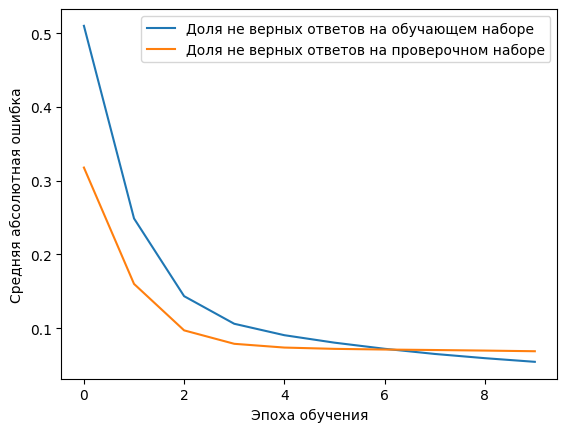

In [ ]:

# Визуализация точности на обучающей выборке
plt.plot(history.history['loss'], 
         label='Доля не верных ответов на обучающем наборе') #mae accuracy
plt.plot(history.history['val_loss'], 
        label='Доля не верных ответов на проверочном наборе') #val_mae val_accuracy
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
eval = model.evaluate(x_test, y_test)
print(eval)

4/4 [==============================] - 3s 13ms/step - loss: 0.0689 - accuracy: 0.9914
[0.06886612623929977, 0.9913793206214905]


In [ ]:

# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_train)

# Расчет среднего значения ошибки 
print(mean_absolute_error(pred, y_train))  

15/15 [==============================] - 0s 17ms/step
0.02159827213822894
